## Scikit-learn LIBRARY FOR MACHINE LEARNING MODELING
### AKA sklearn

In [1]:
# list of contents
workflow = [
    "An end-to-end Scikit-Learn workflow",
    "Getting the data ready",
    "Choose the right estimator/algorithm for our problems",
    "Fit the model/algorithm and use it to make predictions on our data",
    "Evaluating a model",
    "Improve a model",
    "Save and load a trained model",
    "Putting it all together",
]

In [2]:
workflow

['An end-to-end Scikit-Learn workflow',
 'Getting the data ready',
 'Choose the right estimator/algorithm for our problems',
 'Fit the model/algorithm and use it to make predictions on our data',
 'Evaluating a model',
 'Improve a model',
 'Save and load a trained model',
 'Putting it all together']

In [3]:
# standart imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Getting our data ready to be used with machine learning

Logics:
* Split the data into features and labels "usually 'X' and 'y'".
* Filling "also called imputing" or disregarding missing values.
* Converting non-numerical values to numerical values "also called feature encoding".

In [4]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# axis=1 is column
# axis=0 is row

X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [9]:
X.shape

(303, 13)

In [10]:
X.shape[0] * 0.8

242.4

In [11]:
len(heart_disease)

303

### Convert Data To Numbers

In [12]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [13]:
len(car_sales)

1000

In [14]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [15]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [18]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [19]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [20]:
# refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# model.fit(X_train, y_train)

In [21]:
# model.score(X_test, y_test)

In [22]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### Handling Missing Values With Pandas

* Fill them with some value "also known as imputation".
* Remove the samples with missing data altogether.

In [23]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [24]:
# show how many missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Option 1: Fill missing data with Pandas

In [25]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [26]:
# fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [27]:
# check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [28]:
# remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [29]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [30]:
# get data ready
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [31]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Handling Missing Values With Scikit-learn
#### Option 2: Fill missing values with sklearn

In [32]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
# drop the rows with no prices
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [34]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [35]:
# fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical values with mean()
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature =["Odometer (KM)"]

# create an imputer "something that fills missing data"
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [36]:
pd.DataFrame(filled_X)

,0,1,2,3
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [37]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [38]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [39]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [40]:
# data as number and filled "no missing values"
# fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [41]:
workflow

['An end-to-end Scikit-Learn workflow',
 'Getting the data ready',
 'Choose the right estimator/algorithm for our problems',
 'Fit the model/algorithm and use it to make predictions on our data',
 'Evaluating a model',
 'Improve a model',
 'Save and load a trained model',
 'Putting it all together']

## Choose the right estimator/algorithm for our problems

Sklearn uses estimator as another term for machine learning model or algorithm.

### Choosing The Right Model For Your Data

* Classification: predicting whether a sample is one thing or another "ex: heart disease"
* Regression: predicting a number "ex: car sales price"

![sklearn_mi_map_cheat](documents/sklearn_mi_map_cheat.png)

### Picking a machine learning model for a regression model

In [42]:
# import Boston housing dataset from https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
# boston = pd.read_csv('data/boston_house_prices.csv', header=None, delimiter=r"\s+", names=column_names)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [43]:
boston_df = pd.DataFrame(data, columns=column_names)
boston_df["target"] = target

In [44]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
# how many samples
len(boston_df)

506

In [46]:
# Ridge regression
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168518

In [47]:
# how do we improve this score?
# what if Ridge wasn't working?

### Choosing The Right Model For Your Data 2 (Regression)

In [48]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop("target", axis=1)
y= boston_df["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [49]:
# check the Ridge model again
model.score(X_test, y_test)

0.6662221670168518

### Choosing The Right Model For Your Data 3 (Classification)

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [50]:
heart_disease = pd.read_csv("data/heart-disease.csv")
len(heart_disease)

303

In [51]:
# model "LinearSVC"
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC(dual=False)
clf.fit(X_train, y_train)

# evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [52]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [53]:
# predict
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 61 points : 8


In [54]:
# model "RandomForestClassifier"
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# evaluate the RandomForestClassifier
rfc.score(X_test, y_test)

0.8524590163934426

In [55]:
# predict
y_predrfc = rfc.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_predrfc).sum()))

Number of mislabeled points out of a total 61 points : 8


#### Tidbit:
* If you have structured data, use ensemble methods "data of table"
* If you have unstructed data, use deep learning or transfer learning "pictures, images, videos"

## Fit the model/algorithm and use it to make predictions on our data
### Fitting A Model To The Data

#### Different names for:
* X = features, features variables, data
* y = labels, targets, target variables

In [56]:
# model "RandomForestClassifier"
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
rfc = RandomForestClassifier()

# fit the model to the data
# training the machine learning model
rfc.fit(X_train, y_train)

# evaluate the RandomForestClassifier
# use the patterns the model has learned
rfc.score(X_test, y_test)

0.8524590163934426

In [57]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Making Predictions With Our Model

##### two ways to make predictions
* predict()
* predict_proba()

### Make predictions with `predict()`

In [59]:
# predict target
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
# existing truth data
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [62]:
clf.score(X_test, y_test)

0.8688524590163934

In [63]:
# checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

### Make predictions with `predict_proba()`

In [64]:
# predict_proba() returns probabilities of a classification label
# probability of [0, 1]
# first example, "0" -> 0.89 probability, "1" -> 0.11 probability
# so It is "0"
rfc.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [65]:
# predict()
rfc.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

#### when use predict_proba()
#### that if you want to set probability % more than %80
#### if that is the case, you can do with predict_proba()

### Making Predictions With Our Model (Regression)

`predict()` can also be used for regression models.

In [66]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [67]:
model.score(X_test, y_test)

0.8654448653350507

In [68]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [69]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [70]:
# Compare the predictions to the truth
# meaning: as average there is a "2.13" diffrences 
# between prediction and truth data
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## Evaluating a model

### Evaluating A Machine Learning Model (Score)

Three ways to evaluating modeling:
* Estimator `score` method
* The `scoring` parameter
* Problem-specific metric functions

#### Estimator Score Method

In [71]:
# for classification
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
clf.score(X_train, y_train)

1.0

In [73]:
clf.score(X_test, y_test)

0.8524590163934426

In [74]:
# for regression
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [75]:
model.score(X_test, y_test)

0.8654448653350507

#### `.score` method is default calculation to find prediction percentage !!!

### Evaluating A Machine Learning Model 2 (Cross Validation)

#### The `scoring` parameter

In [76]:
from sklearn.model_selection import cross_val_score

# for classification
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [77]:
clf.score(X_test, y_test)

0.8524590163934426

In [78]:
# cv = cross-validation numbers
# test data can be splitted by cv, and train in as per this
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

![crossvalidation](documents/cross_validation.png)

![crossvalidation_lrn](documents/sklearn-cross-validation.png)

In [79]:
# take average of cv learning %
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [80]:
# real learning score is: clf_cross_val_score
# 0.8248087431693989

In [81]:
# default scorng parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [82]:
# scoring parameter set to none by default meaning is
# It use clf.score value in below
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### Evaluating A Classification Model 1 (Accuracy)

#### Classification model evaluation metrics
* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification report

In [83]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Accuracy

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [85]:
np.mean(cross_val_score)

0.8248087431693989

In [86]:
print(f"Heart Disease Classifie Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifie Cross-Validated Accuracy: 82.48%


## Evaluating A Classification Model 2 (ROC Curve)
### Area under ROC curve

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are comparison of a model's true positive rate (tpr) versus a models false postive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [87]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [89]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [90]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

## Evaluating A Classification Model 3 (ROC Curve)

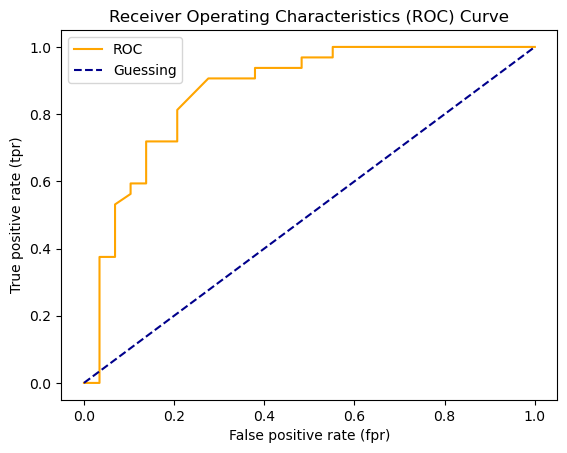

In [91]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

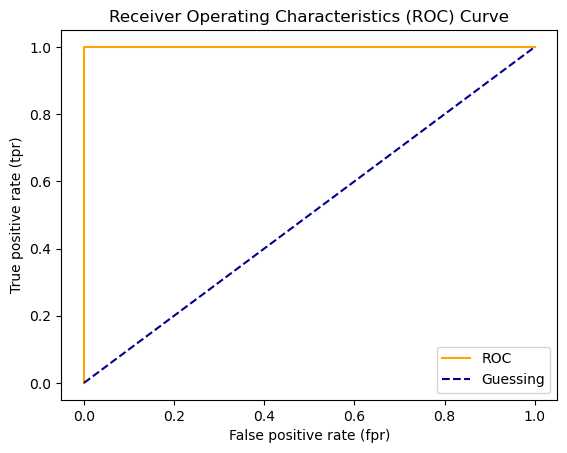

In [93]:
# plot prefect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [94]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Evaluating A Classification Model 4 (Confusion Matrix)

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

***In essence, giving you an idea of where the model is getting confused.***

In [95]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [96]:
# Visualize confision matrix with pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Labels"], 
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [97]:
# INSTALL SEABORN INSIDE NOTEBOOK
# import sys
# !conda install --yes --prefix (sys.prefix) seaborn

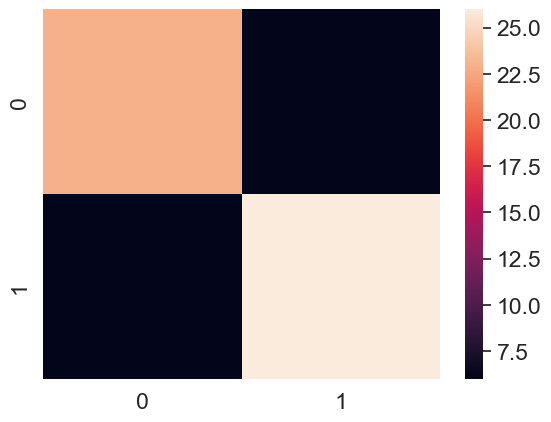

In [98]:
# make our confusion matrix more visual 
# with Seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

### Evaluating A Classification Model 5 (Confusion Matrix)

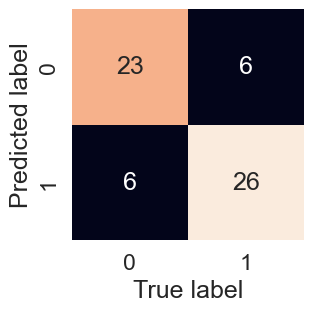

In [99]:
# fix issues about above map

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
#     # fix the broken annotations "happened in old version of matplotlib"
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top-0.5)

plot_conf_mat(conf_mat)

#### Anatomy of confusion matrix
![confusion_anatomy](documents/sklearn-confusion-matrix-anatomy.png)

#### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

* `sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)` - this takes a fitted estimator (like our `clf` model), features `(X)` and labels `(y)`, it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.
* `sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)` - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

> Note: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:


import sklearn
sklearn.__version__

> If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

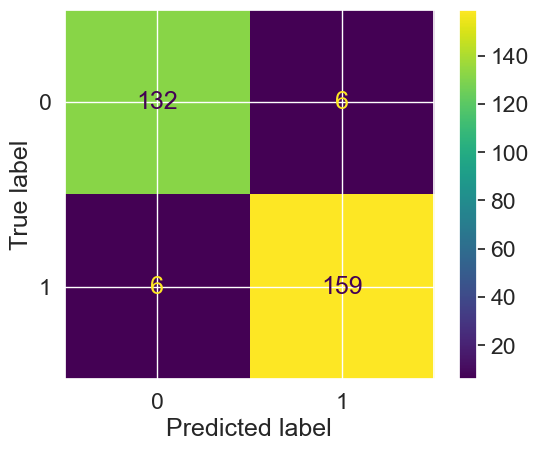

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

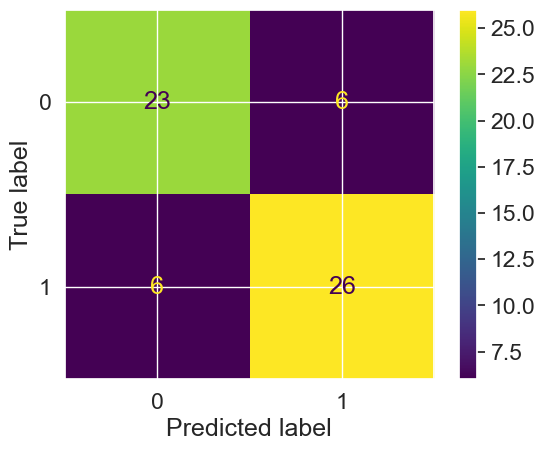

In [101]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

### Evaluating A Classification Model 6 (Classification Report)

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [103]:
# example; look 10000 people for one has heart_disease
# and rest of no disease
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* **Precision** and **recall** become more important when classes are imbalanced.

* If false positive predictions are worse than false negatives, aim for higher precision.

* If false negative predictions are worse than false positives, aim for higher recall.

* **F1-score** is a combination of precision and recall.

### Evaluating A Regression Model 1 (R2 Score)

* **R^2 (pronounced r-squared) or coefficient of determination**
> Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

* **Mean absolute error (MAE)**
> The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.


* **Mean squared error (MSE)**
> The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**R^2**

In [104]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train);

In [105]:
model.score(X_test, y_test)

0.8654448653350507

In [106]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [107]:
r2_score(y_test, y_test)

1.0

### Evaluating A Regression Model 2 - Mean Absolute Error (MAE)

In [108]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [109]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]

df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


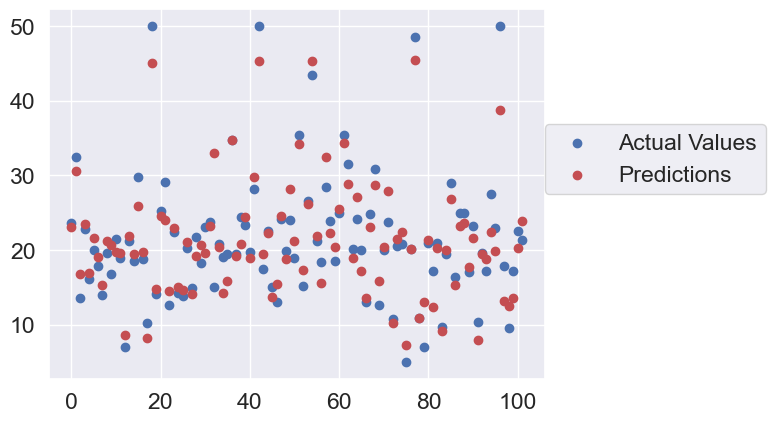

In [110]:
# draw plot for above data
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Actual Values")
ax.scatter(x, df["predicted values"], c='r', label='Predictions')
ax.legend(loc=(1, 0.5));

### Evaluating A Regression Model 3 - Mean Squared Error (MSE)

In [111]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [112]:
# calculate MSE by handsquared = 
squared = np.square(df["differences"])
squared

173     0.269361
274     3.334276
491     9.979281
72      0.435600
452     0.628849
         ...    
412    22.477081
436     8.271376
411    12.873744
86      5.267025
75      5.914624
Name: differences, Length: 102, dtype: float64

In [113]:
squared.mean()

9.867437068627439

> MSE will always be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

**Now you might be thinking, which regression evaluation metric should you use?**

* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* MAE gives a better indication of how far off each of your model's predictions are on average.

* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

> **Pay more attention to MAE:** When being `$10,000` off is *twice* as bad as being `$5,000` off.

> **Pay more attention to MSE:** When being `$10,000` off is *more than twice* as bad as being `$5,000` off.

***Note: What we've covered here is only a handful of potential metrics you can use to evaluate your models.***

***Evaluation — What defines success? Is a 95% accurate machine learning model good enough?***

You’ve defined your business problem in machine learning terms and you have data. Now define what defines success. There are different evaluation metrics for classification, regression and recommendation problems. Which one you choose will depend on your goal.

> For this project to be successful, the model needs to be over 95% accurate at whether someone is at fault or not at fault.

A 95% accurate model may sound pretty good for predicting who’s at fault in an insurance claim. But for predicting heart disease, you’ll likely want better results.

Other things you should take into consideration for classification problems.

* **False negatives** — Model predicts negative, actually positive. In some cases, like email spam prediction, false negatives aren’t too much to worry about. But if a self-driving cars computer vision system predicts no pedestrian when there was one, this is not good.

* **False positives** — Model predicts positive, actually negative. Predicting someone has heart disease when they don’t, might seem okay. Better to be safe right? Not if it negatively affects the person’s lifestyle or sets them on a treatment plan they don’t need.

* **True negatives** — Model predicts negative, actually negative. This is good.

* **True positives** — Model predicts positive, actually positive. This is good.

* **Precision** — What proportion of positive predictions were actually correct? A model that produces no false positives has a precision of 1.0.

* **Recall** — What proportion of actual positives were predicted correctly? A model that produces no false negatives has a recall of 1.0.

* **F1 score** — A combination of precision and recall. The closer to 1.0, the better.

* **Receiver operating characteristic (ROC) curve & Area under the curve (AUC)** — The ROC curve is a plot comparing true positive and false positive rate. The AUC metric is the area under the ROC curve. A model whose predictions are 100% wrong has an AUC of 0.0, one whose predictions are 100% right has an AUC of 1.0.

For regression problems (where you want to predict a number), you’ll want to minimise the difference between what your model predicts and what the actual value is. If you’re trying to predict the price a house will sell for, you’ll want your model to get as close as possible to the actual price. To do this, use MAE or RMSE.

* **Mean absolute error (MAE)** — The average difference between your model's predictions and the actual numbers.

* **Root mean square error (RMSE)** — The square root of the average of squared differences between your model's predictions and the actual numbers.

Use RMSE if you want large errors to be more significant. Such as, 

* predicting a house to be sold at `$300,000` instead of `$200,000` and being off by `$100,000` is more than twice as bad as being off by `$50,000`. 

* Or MAE if being off by `$100,000` is twice as bad as being off by `$50,000`.

Recommendation problems are harder to test in experimentation. One way to do so is to take a portion of your data and hide it away. When your model is built, use it to predict recommendations for the hidden data and see how it lines up.

Let’s say you’re trying to recommend customers products on your online store. You have historical purchase data from 2010–2019. You could build a model on the 2010–2018 data and then use it to predict 2019 purchases. Then it becomes a classification problem because you’re trying to classify whether or not someone is likely to buy an item.

However, traditional classification metrics aren’t the best for recommendation problems. Precision and recall have no concept of ordering.

If your machine learning model returned back a list of 10 recommendations to be displayed to a customer on your website, you’d want the best ones to be displayed first right?

* **Precision @ k (precision up to k)** — Same as regular precision, however, you choose the cutoff, k. For example, precision at `5`, means we only care about the top `5` recommendations. You may have `10,000` products. But you can’t recommend them all to your customers.

> To begin with, you may not have an exact figure for each of these. But knowing what metrics you should be paying attention to gives you an idea of how to evaluate your machine learning project.

### Evaluating A Model With Cross Validation and Scoring Parameter

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [115]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [116]:
# cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [117]:
# Accuracy
np.random.seed(42) # increase prediction rate
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [118]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [119]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [120]:
# F1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

***How about our regression model?***

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [122]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [123]:
# check average differences
np.mean(cv_r2)

0.6243870737930857

In [124]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [125]:
# Mean absolute error
# neg means: higher values are better than lower values
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [126]:
np.mean(cv_mae)

-3.003222869345758

In [127]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

In [128]:
# check differences average
np.mean(cv_mse)

-21.12863512415064

### Evaluating A Model With Scikit-learn Functions

**METRICS FUNCTIONS**

***Classification evaluation functions***

* Accuracy we can use `accuracy_score()`
* Precision we can use `precision_score()`
* Recall we can use `recall_score()`
* F1 we can use `f1_score()`

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# use numpy random seed to learn better
np.random.seed(42)

# split data as per prediction column
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# set how many percentage of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# call model and fit to the data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make some predictions
y_preds = clf.predict(X_test)

# evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


***Summary information for your classification model in above***
* `Accuracy`: default **prediction/learning** rate.
* `Precision`: how many **false positive** exist in model.
* `Recall`: how many **false negative** exist in model.
* `F1`: combination of **precision and recall**.

**Regression evaluation functions**

In [130]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# make predictions using regression model
y_preds = model.predict(X_test)

# evaluate the regression model
print("Regression model metrics on the test set")
print(f"r^2: {r2_score(y_test, y_preds)*100:.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set
r^2: 86.54
MAE: 2.14
MSE: 9.87


***Summary information for your regression model in above***
* `r^2`: default **prediction/learning** rate.
* `Mean Absolute Error (MAE)`: average differences between **Actual and Predicted values** in model.
* `Mean Squared Error (MSE)`: squaring the differences between **Actual and Predicted values** in model.

### Improving A Machine Learning Model

**First predictions** = baseline predictions.
**First model** = baseline model.

**Way to Improve model**

***From a data perspective:***
* Could we collect more data? "generally, the more data, the better"
* Could we improve our data? 

***From a model perspective***
* Is there a better model we could use? "chosing complex method to training model"
* Could we improve the current model? "hyper-parameter"

***Hyperparameters vs Parameters***
* **Parameters** = model find these patterns in data
* **Hyperparameters** = settings on a model you can adjust to "ptentially" impove its ability to find patterns

***three ways to adjust hyperparameters***
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [131]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [132]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter tuning

![sklearn-hyperparameter-tuning-oven](documents/sklearn-hyperparameter-tuning-oven.png)

> ***Regarding above picture,*** with hyperparameter tuning we can figure out to increase temperature of bakery for best baked chicken.

### Tuning Hyperparameters

**By Hand**

![sklearn-train-valid-test-annotated](documents/sklearn-train-valid-test-annotated.png)

**Split data for 3 sets, `Training`, `Validation` and `Test`**

In [133]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

***best common options to pickup and adjust in hyperparameters***

* `max_depth`: the maximum depth of the tree.
* `max_features`: the number of features to consider when looking for the best split.
* `min_samples_leaf` : the minimum number of samples required to be at a leaf node.
* `min_samples_split`: min_samples_split specifies the minimum number of samples required to split an internal node, while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.
* `n_estimators` : the number of trees you want to build before taking the maximum voting or averages of predictions.

In [134]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    in classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [135]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
# frac=1 -> 100% of data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# show length of splited parts
# len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make baseline predictions
y_preds = clf.predict(X_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [136]:
np.random.seed(42)

# create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=250)
clf_2.fit(X_train, y_train)

# make predictions
y_preds_2 = clf_2.predict(X_valid)

# evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 84.44%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


In [137]:
clf_3 = RandomForestClassifier(n_estimators=10,
                               max_depth=30)
clf_3.fit(X_train, y_train)
y_preds_3 = clf_3.predict(X_valid)
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 86.67%
Precision: 0.91
Recall: 0.84
F1 score: 0.87


### Tuning Hyperparameters 2

**Randomly with RandomSearchCV**

> in cross-validation section, I said how can find best test data from all data, so this is the answer in below

In [138]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [1, 2, 3, 4, 5],
        "max_depth": [None, 30, 60, 90, 120],
        "max_features": ["sqrt"],
        "min_samples_split": [6, 8, 15, 30],
        "min_samples_leaf": [4, 12, 24]}

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
# n_jobs -> how many cpu-core will use for operation.
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizeSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=60, # number of models to try
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=4; total time=   0.0s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=4; total time=   0.0s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=4; total time=   0.0s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=4; total time=   0.0s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=4; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=4; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=4; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=4; total

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=24, min_samples_split=15, n_estimators=2; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=3; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=3; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=3; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=3; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=3; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=3; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=3; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_s

[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=4; total time=   0.0s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=4; total time=   0.0s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=12, min_samples_split=8, n_estimators=4; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=24, min_samples_split=8, n_estimators=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=24, min_samples_split=8, n_estimators=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=24, min_samples_split=8, n_estimators=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=24, min_samples_split=8, n_estimators=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=24, min_samples_split=8, n_estimators=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, m

[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=5; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=5; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=3; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=3; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=3; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=3; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=3; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=2; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_sa

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=4; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=4; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=4; total time=   0.0s


In [139]:
# found best hyperparameters using randomsearchCV
rs_clf.best_params_

{'n_estimators': 5,
 'min_samples_split': 6,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 90}

In [140]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.79
Recall: 0.82
F1 score: 0.81


In [141]:
# check previous models
print(baseline_metrics, clf_2_metrics, clf_3_metrics)

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85} {'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86} {'accuracy': 0.87, 'precision': 0.91, 'recall': 0.84, 'f1': 0.87}


### Tuning Hyperparameters 3

**Exhaustively with GridSearchCV**
> The main difference between `GridSearchCV` and `RandomizedSearchCV` is `GridSearchCV` searches across a grid of hyperparamters exhaustively, where as, `RandomizedSearchCV` searches across a grid of hyperparameters randomly (stopping after `n_iter` combinations).

`n_estimators` higher number of estimators will spent more time

In [142]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [15],
          'max_depth': [None, 30, 60, 90, 200, 500, 1200],
          'max_features': ['sqrt'],
          'min_samples_split': [2, 4, 6, 8],
          'min_samples_leaf': [4, 8, 12, 16, 20]} 

In [143]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
#  “n_jobs” to -1 when using a CPU and 1 when using a GPU
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizeSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_est

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=8, n_estimators=15; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, 

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_sa

[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=60, max_features=sqrt

[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=90, max_features=sqrt

[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=12, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=200, max_feat

[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=500, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=500, max_features=sqr

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_fea

[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200, max_features=sqrt, min_samples_leaf=20, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=1200,

In [144]:
gs_clf.best_params_

{'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'n_estimators': 15}

In [145]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.76
Recall: 0.93
F1 score: 0.84


***compare `baseline`, `byHand`, `randomsearchCV` and `gridsearchCV` metrics***

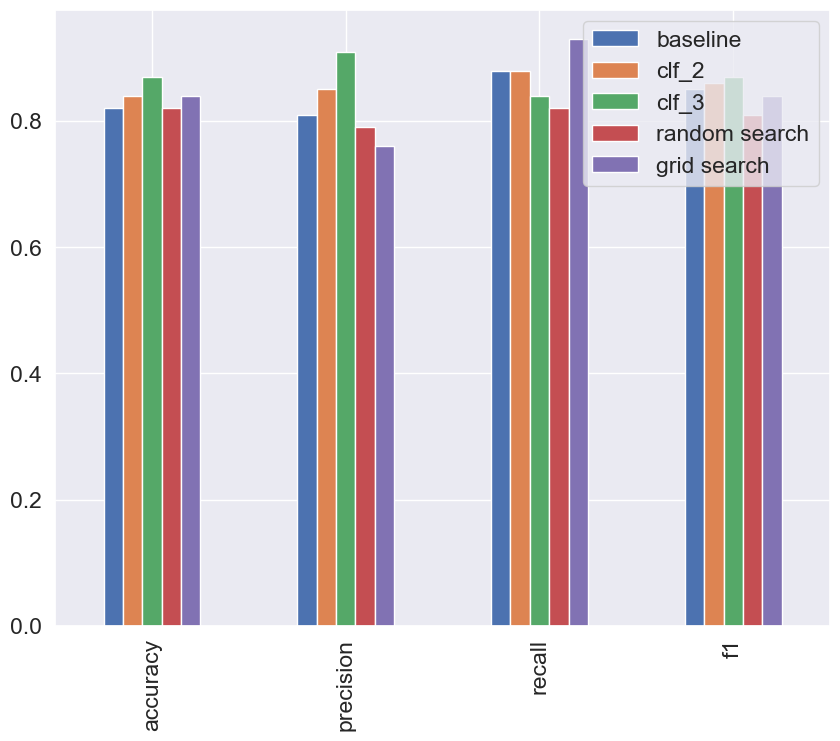

In [146]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "clf_3": clf_3_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

### Quick Tip Correlation Analysis

> In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with RandomizedSearchCV and GridSearchCV but it's likely these improvements will be marginal.

***A few next ideas you could try:***

* Collecting more data - Based on the results our models are getting now, it seems like they're finding some patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.
* Try a more advanced model - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as `XGBoost` or `CatBoost` might perform better.

**CatBoost**

In [156]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instatiate RandomForestClassifier
# #  “n_jobs” to -1 when using a CPU and 1 when using a GPU
# clf = RandomForestClassifier(n_jobs=1)

# setup CatBoost
catbost_clf = CatBoostClassifier(iterations=45,
                           depth=16,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=True)

# Fit the CatBoost version of clf
catbost_clf.fit(X_train, y_train);

0:	learn: 0.6736525	total: 13.8ms	remaining: 606ms
1:	learn: 0.6624411	total: 37.9ms	remaining: 815ms
2:	learn: 0.6387086	total: 39.4ms	remaining: 552ms
3:	learn: 0.6261675	total: 83.6ms	remaining: 857ms
4:	learn: 0.6080305	total: 85.6ms	remaining: 685ms
5:	learn: 0.5892769	total: 91.2ms	remaining: 593ms
6:	learn: 0.5691822	total: 92.6ms	remaining: 503ms
7:	learn: 0.5600740	total: 137ms	remaining: 635ms
8:	learn: 0.5527363	total: 218ms	remaining: 872ms
9:	learn: 0.5413063	total: 223ms	remaining: 782ms
10:	learn: 0.5259595	total: 224ms	remaining: 692ms
11:	learn: 0.5115339	total: 227ms	remaining: 625ms
12:	learn: 0.5045568	total: 309ms	remaining: 761ms
13:	learn: 0.4976245	total: 350ms	remaining: 775ms
14:	learn: 0.4920891	total: 503ms	remaining: 1s
15:	learn: 0.4798252	total: 504ms	remaining: 914ms
16:	learn: 0.4728723	total: 515ms	remaining: 849ms
17:	learn: 0.4664055	total: 521ms	remaining: 781ms
18:	learn: 0.4599603	total: 599ms	remaining: 820ms
19:	learn: 0.4547917	total: 751ms	rem

In [157]:
catbost_y_preds = catbost_clf.predict(X_test)

# evaluate the predictions
catbost_metrics = evaluate_preds(y_test, catbost_y_preds)

Acc: 88.52%
Precision: 0.82
Recall: 0.96
F1 score: 0.89


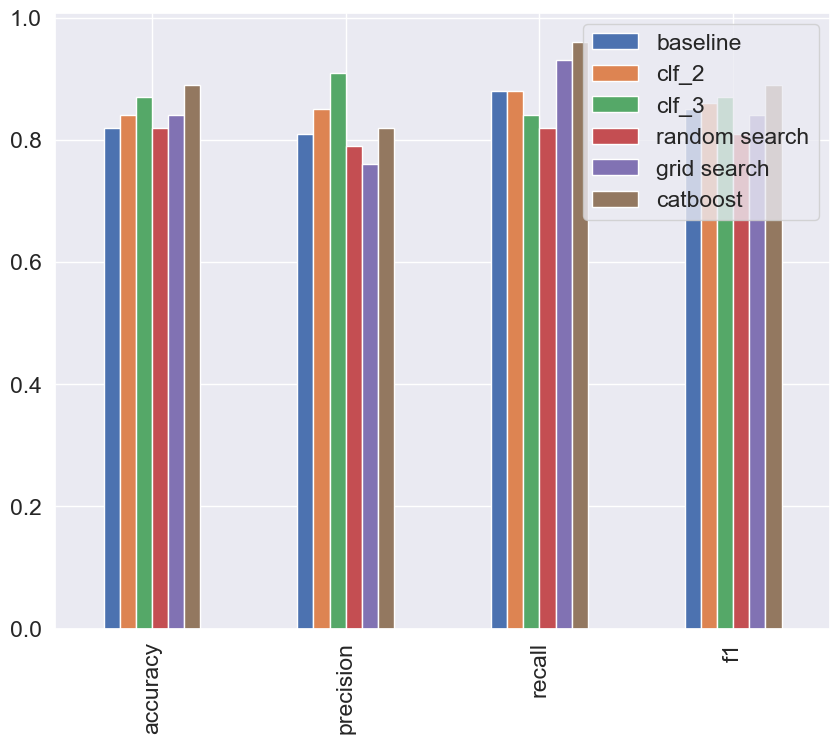

In [158]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "clf_3": clf_3_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics,
                                "catboost": catbost_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

### Saving And Loading A Model

**two ways to save and load machine learning models:**

* with python's `pickle`module
* with the `joblib`module

***Pickle***

In [159]:
import pickle

# save an existing model to file
pickle.dump(catbost_clf, open("models/catboost_randomforest_classification_model_1.pkl", "wb"))

In [160]:
# load a saved model
loaded_pickle_model = pickle.load(open("models/catboost_randomforest_classification_model_1.pkl", "rb"))

In [161]:
# make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 88.52%
Precision: 0.82
Recall: 0.96
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.82, 'recall': 0.96, 'f1': 0.89}

### Saving And Loading A Model 2

***joblib***

In [162]:
from joblib import dump, load

# save model to file
dump(catbost_clf, filename="models/catboost_randomforest_classification_model_1.joblib")

['models/catboost_randomforest_classification_model_1.joblib']

In [163]:
# import a saved joblib model
loaded_job_model = load(filename="models/catboost_randomforest_classification_model_1.joblib")

In [164]:
# make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 88.52%
Precision: 0.82
Recall: 0.96
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.82, 'recall': 0.96, 'f1': 0.89}

***According to Documentation, use `joblib`***